In [1]:
# General imports
import numpy as np
import healpy as hp
import sys, os, pickle

basepath = "../"
sys.path.insert(0, basepath)
from lib.hotspot_search import skyscan_handler

In [2]:
# Stuff for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.size"]=16
mpl.rcParams["font.family"]="sans-serif"
mpl.rcParams["text.usetex"]=True
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
from itertools import cycle
from matplotlib import cycler

ps_map_colors =  {'blue' : ((0.0, 0.0, 1.0),
                            (0.05, 1.0, 1.0),
                            (0.4, 1.0, 1.0),
                            (0.6, 1.0, 1.0),
                            (0.7, 0.2, 0.2),
                            (1.0, 0.0, 0.0)),
                  'green': ((0.0, 0.0, 1.0),
                            (0.05, 1.0, 1.0),
                            (0.5, 0.0416, 0.0416),
                            (0.6, 0.0, 0.0),
                            (0.8, 0.5, 0.5),
                            (1.0, 1.0, 1.0)),
                  'red':   ((0.0, 0.0, 1.0),
                            (0.05, 1.0, 1.0),
                            (0.5, 0.0416, 0.0416),
                            (0.6, 0.0416, 0.0416),
                            (0.7, 1.0, 1.0),
                            (1.0, 1.0, 1.0))}

ps_map = mpl.colors.LinearSegmentedColormap('ps_map', ps_map_colors, 256)

In [3]:
def plot_skymap(pVal_map):
    hp.projview(pVal_map, rot=(180,0,0), coord=["G"], graticule=True, 
                graticule_labels=True, unit="$-\log_{10}(p_{\mathrm{local}})$",
                cb_orientation="horizontal", projection_type='hammer', 
                min=0, max=6, flip='astro', rot_graticule=True,
                cmap=ps_map, longitude_grid_spacing=45, latitude_grid_spacing=30,
                override_rot_graticule_properties={'g_linestyle':":", 'g_alpha':1},
                fontsize={'cbar_label':20, 'cbar_tick_label':16, 'xtick_label':16, 'ytick_label':16},
                show_tickmarkers=True, cbar_ticks=[0,1,2,3,4,5,6],
                override_plot_properties={'cbar_label_pad': 5, 'cbar_pad': 0.07, "cbar_tick_direction": "in"},
                xtick_label_color="k", phi_convention="counterclockwise"
               )
    ax = plt.gca()
    ax.set_yticklabels([r"$-60^{\circ}$", r"$-30^{\circ}$", "$\\boldsymbol{24\mathrm{h}}$", r"$+30^{\circ}$", r"$+60^{\circ}$"], fontsize=16)
    ax.text(1.01, 0.5, "$\\boldsymbol{0\mathrm{h}}$", horizontalalignment="left", verticalalignment="center",
            transform=ax.transAxes, fontsize=16
           )

In [4]:
# Load the 7 year skymap and prepare it for plotting

this_folder = 'data/7yrPS_data/'

pVals = hp.read_map(os.path.join(basepath, this_folder, "log10p_maps.fits"))
nside=512

In [5]:
# Initialize the skyscan handler
skyscan = skyscan_handler(nside=nside)
skyscan.pix_map = np.arange(hp.nside2npix(nside))
skyscan.log10p_map = pVals

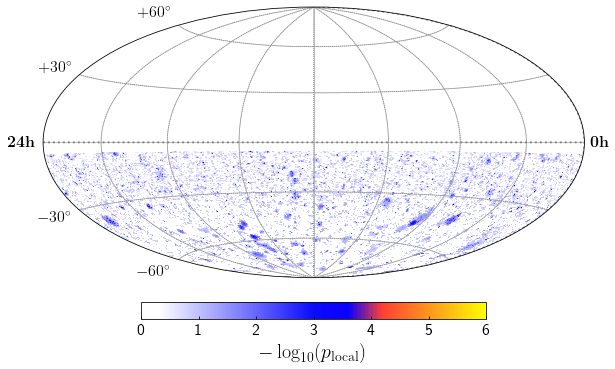

In [8]:
# Prepare the Southern Sky search and save the hotspots
skyscan.prepare_full_scan(dec_range=(-85,-5))
hotspots = skyscan.get_hotspots(log10p_threshold=2.0, psi_min=1.0)
np.save(os.path.join(basepath,this_folder,"hotspots_south.npy"), hotspots)
plot_skymap(skyscan.full_skyscan['log10p'])

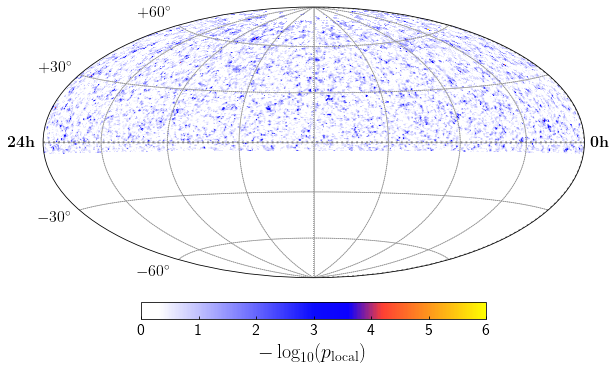

In [9]:
# Prepare the Northern Sky search and save the hotspots
skyscan.prepare_full_scan(dec_range=(-5,85))
hotspots = skyscan.get_hotspots(log10p_threshold=2.0, psi_min=1.0)
np.save(os.path.join(basepath,this_folder,"hotspots_north.npy"), hotspots)
plot_skymap(skyscan.full_skyscan['log10p'])


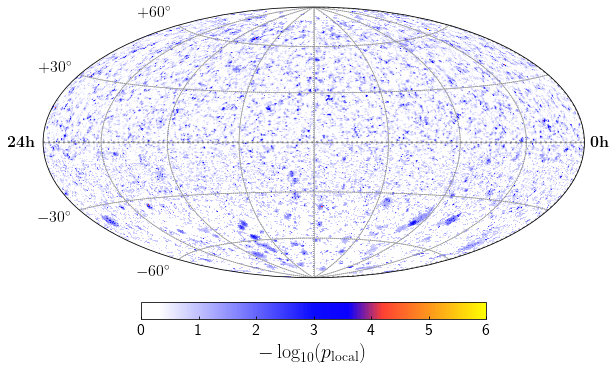

In [10]:
# Prepare the Full Sky search and save the hotspots
skyscan.prepare_full_scan(dec_range=(-85,85))
hotspots = skyscan.get_hotspots(log10p_threshold=2.0, psi_min=1.0)
np.save(os.path.join(basepath,this_folder,"hotspots.npy"), hotspots)
plot_skymap(skyscan.full_skyscan['log10p'])